# PageRank

This notebook illustrates the ranking of the nodes of a graph by [PageRank](https://scikit-network.readthedocs.io/en/latest/reference/ranking.html#pagerank).

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import sknetwork as skn

## Undirected graphs

**Loading**

In [2]:
adjacency = skn.data.karate_club()

**Ranking**

In [3]:
pagerank = skn.ranking.PageRank()
scores = pagerank.fit_transform(adjacency)

**Visualization**

In [4]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [5]:
pos = nx.spring_layout(graph)

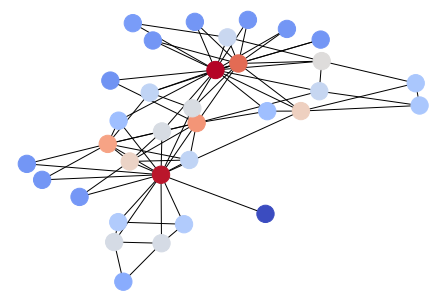

In [6]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=np.log(scores), cmap='coolwarm')

**Ranking with personalization**

In [7]:
target = [1, 10]

In [8]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[target] = 1

In [9]:
scores = pagerank.fit_transform(adjacency, personalization)

**Visualization**

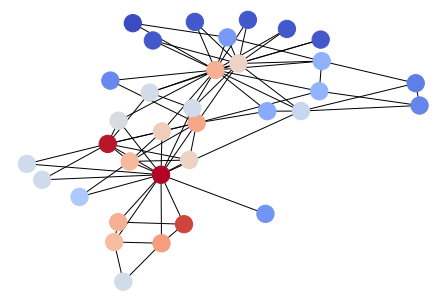

In [10]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=np.log(scores), cmap='coolwarm')

## Directed graphs

**Loading**

In [11]:
adjacency, names = skn.data.painters(return_labels=True)

**Ranking**

In [12]:
pagerank = skn.ranking.PageRank()
scores = pagerank.fit_transform(adjacency)

**Visualization**

In [13]:
graph = nx.from_scipy_sparse_matrix(adjacency, create_using=nx.DiGraph())

In [14]:
pos = nx.spring_layout(graph)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


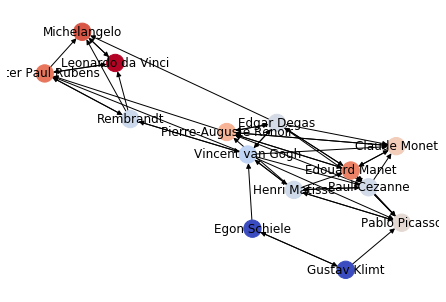

In [15]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=np.log(scores), cmap='coolwarm', labels=names)

**Ranking with personalization**

In [16]:
cezanne = 11

In [17]:
n = adjacency.shape[0]
personalization = np.zeros(n)
personalization[cezanne] = 1

In [18]:
scores = pagerank.fit_transform(adjacency, personalization)

**Visualization**

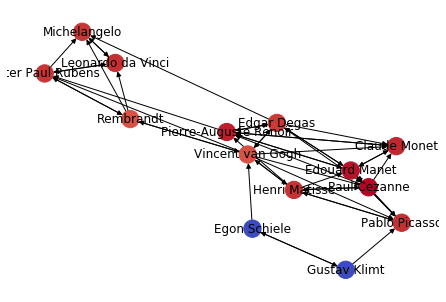

In [19]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=np.log(scores + 1e-10), cmap='coolwarm', labels=names)

## Bipartite graphs

**Loading**

In [11]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)

**Ranking**

In [12]:
bipagerank = skn.ranking.BiPageRank()

In [13]:
drive = 3
aviator = 9

In [14]:
bipagerank.fit(biadjacency, personalization={drive: 1, aviator: 1})
scores = np.concatenate((bipagerank.scores_row_, bipagerank.scores_col_))

**Visualization**

In [15]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [16]:
graph = nx.from_scipy_sparse_matrix(adjacency)
n1, n2 = biadjacency.shape
pos = {i: (0, i) for i in range(n1)}
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)}
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [31]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

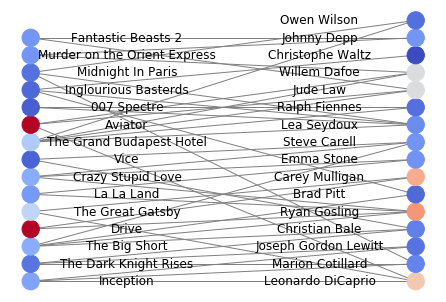

In [32]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos=pos, edge_color='grey', node_color=scores, cmap='coolwarm')
show_labels = nx.draw_networkx_labels(graph, pos_labels, labels=names)